### Sentiment Analysis on Reddit Data (Posts and Comments).

Authors:
- Md. Hefzul **Bari**
- **Sakin** Amin Khan
- Syed **Falahuddin** Quadri

Instructor(s):
- Himanshu Patel (PhD)

In [234]:
# %run script.py

In [235]:
import pandas as pd
import matplotlib.pyplot as plt

In [236]:
df_posts=pd.read_csv('reddit_posts.csv')
df_comments=pd.read_csv('reddit_comments.csv')

# dropping index column, inplace
df_comments.drop(['Unnamed: 0'], axis=1, inplace=True)
df_posts.drop(['Unnamed: 0'], axis=1, inplace=True)

In [237]:
print("Original POSTS COLUMNS: ", df_posts.columns)
print("Original COMMENTS COLUMNS: ", df_comments.columns)

Original POSTS COLUMNS:  Index(['titles', 'post_text', 'ids', 'ups', 'downs', 'upvote_ratio',
       'posted_on', 'num_comments', 'author', 'score', 'subreddit'],
      dtype='object')
Original COMMENTS COLUMNS:  Index(['post_id', 'id', 'comments', 'author', 'score', 'ups', 'downs',
       'posted_on', 'controversiality'],
      dtype='object')


In [238]:
print(f"Unique values in downs column: {df_posts.downs.unique()}")
# calculating downs, as by default reddit only shows ups and upvote_ratio
df_posts['downs']=(df_posts.ups*(1-df_posts.upvote_ratio)).astype(int)

# there is no upvote ratio in comments, so its not reliably possible to calculate downs

Unique values in downs column: [0]


In [239]:
print("Checking number of null values in each column of both dataframes \n")
print("COMMENTS: \n", df_comments.isna().sum())
print()
print("POSTS: \n", df_posts.isna().sum())

Checking number of null values in each column of both dataframes 

COMMENTS: 
 post_id             0
id                  0
comments            0
author              0
score               0
ups                 0
downs               0
posted_on           0
controversiality    0
dtype: int64

POSTS: 
 titles           0
post_text       93
ids              0
ups              0
downs            0
upvote_ratio     0
posted_on        0
num_comments     0
author           0
score            0
subreddit        0
dtype: int64


In [240]:
from wordcloud import WordCloud, STOPWORDS

#plotting wordclouds for titles, post_text and comments to see most common words

stopWordsList = ["artificial","intelligence","artificial intelligence","ai","machine","learning","ml","deep","neural","network","nan","null",'will','says']
for i in stopWordsList:
    STOPWORDS.add(i)

# plt.figure(figsize = (20,20))
f, (ax1, ax2,ax3) = plt.subplots(1,3, figsize = (20,15))
title_wc = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(str(" ".join(str(v) for v in df_posts.titles.values)))
post_text_wc = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(str(" ".join(str(v) for v in df_posts.post_text.values)))
comments_wc = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(str(" ".join(str(v) for v in df_comments.comments.values)))

ax1.set_title('Most Common Words in Titles')
ax1.imshow(title_wc,interpolation = 'bilinear')
ax1.axis('off')

ax2.set_title('Most Common Words in Posts')
ax2.imshow(post_text_wc,interpolation = 'bilinear')
ax2.axis('off')

ax3.set_title('Most Common Words in Comments')
ax3.imshow(comments_wc,interpolation = 'bilinear')
ax3.axis('off')


In [ ]:
from textblob import TextBlob

def getPolarity(text):
    if type(text) != str and text != None:
        return None
    return TextBlob(text).sentiment.polarity

def getSubjectivity(text):
    if type(text) != str and text != None:
        return None
    return TextBlob(text).sentiment.subjectivity

def getAnalysis(score):
    if score < -0.35:
        return 'Negative'
    elif score > -0.35 and score < 0:
        return 'Neutral'
    else:
        return 'Positive'

df_posts['titles_subjectivity'] = df_posts['titles'].apply(getSubjectivity)
df_posts['titles_polarity'] = df_posts['titles'].apply(getPolarity)

# df_posts['post_text_subjectivity'] = df_posts['post_text'].apply(getSubjectivity)
# df_posts['post_text_polarity'] = df_posts['post_text'].apply(getPolarity)

df_comments['comments_subjectivity'] = df_comments['comments'].apply(getSubjectivity)
df_comments['comments_polarity'] = df_comments['comments'].apply(getPolarity)

df_posts['titles_analysis'] = df_posts['titles_polarity'].apply(getAnalysis)
df_posts['post_text_analysis'] = df_posts['post_text_polarity'].apply(getAnalysis)
df_comments['comments_analysis'] = df_comments['comments_polarity'].apply(getAnalysis)

print("POSTS new columns: ", df_posts.columns)
print("COMMENTS new columns: ", df_comments.columns)

POSTS new columns:  Index(['titles', 'post_text', 'ids', 'ups', 'downs', 'upvote_ratio',
       'posted_on', 'num_comments', 'author', 'score', 'subreddit',
       'titles_subjectivity', 'titles_polarity', 'post_text_subjectivity',
       'post_text_polarity', 'titles_analysis', 'post_text_analysis'],
      dtype='object')
COMMENTS new columns:  Index(['post_id', 'id', 'comments', 'author', 'score', 'ups', 'downs',
       'posted_on', 'controversiality', 'comments_subjectivity',
       'comments_polarity', 'comments_analysis'],
      dtype='object')


C:\Users\sdfal\AppData\Local\Temp\ipykernel_19564\3767433017.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  f.show()


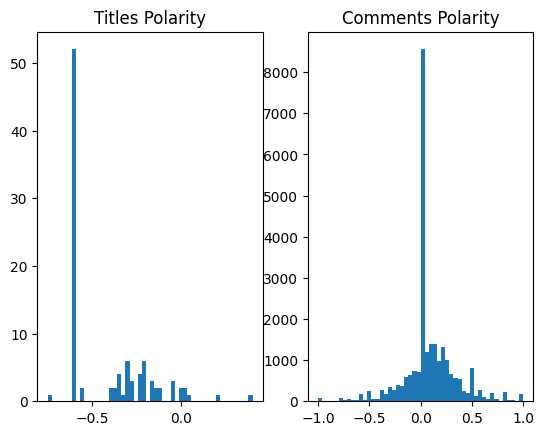

In [ ]:
f, (ax1, ax2) = plt.subplots(1,2)

ax1.hist(df_posts['titles_polarity'], bins=50)
ax2.hist(df_comments['comments_polarity'], bins=50)
ax1.set_title("Titles Polarity")
ax2.set_title("Comments Polarity")
f.show()

C:\Users\sdfal\AppData\Local\Temp\ipykernel_19564\3675354332.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  f.show()


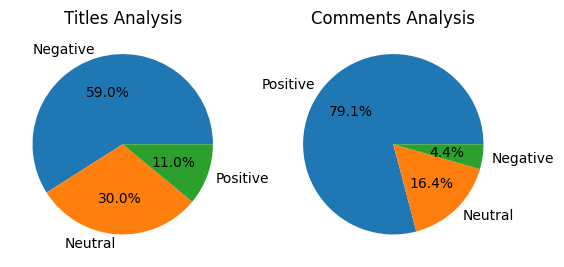

In [ ]:
f , (ax1,ax2) = plt.subplots(1,2)
ax1.pie(df_posts['titles_analysis'].value_counts(),labels=df_posts['titles_analysis'].value_counts().index,autopct='%1.1f%%')
ax2.pie(df_comments['comments_analysis'].value_counts(),labels=df_comments['comments_analysis'].value_counts().index,autopct='%1.1f%%')
ax1.set_title("Titles Analysis")
ax2.set_title("Comments Analysis")
f.show()

<Axes: xlabel='ups', ylabel='Count'>

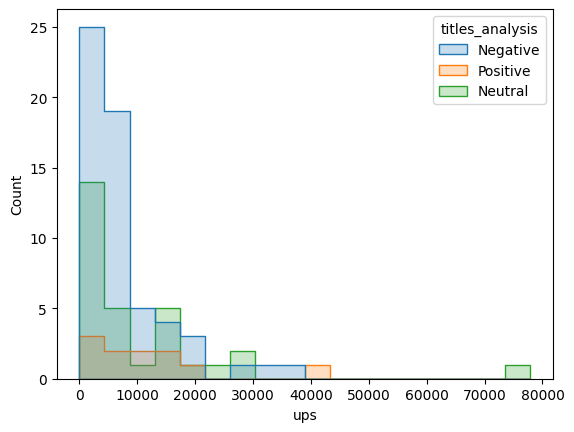

In [ ]:
import seaborn as sns

sns.histplot(df_posts, x="ups", hue="titles_analysis", element="step")

<Axes: xlabel='ups', ylabel='Count'>

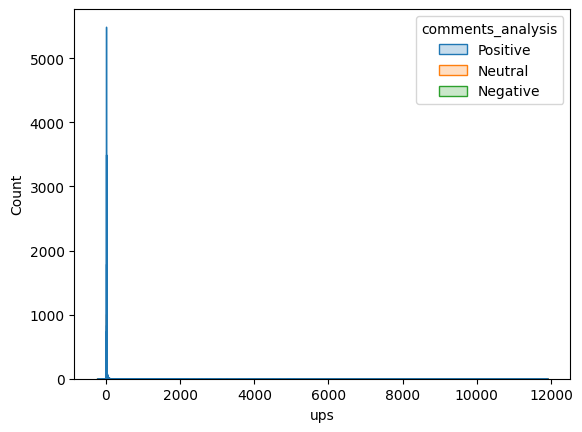

In [ ]:
sns.histplot(df_comments, x="ups", hue="comments_analysis", element="step")

Text(0.5, 1.0, 'Comments Polarity vs Subjectivity')

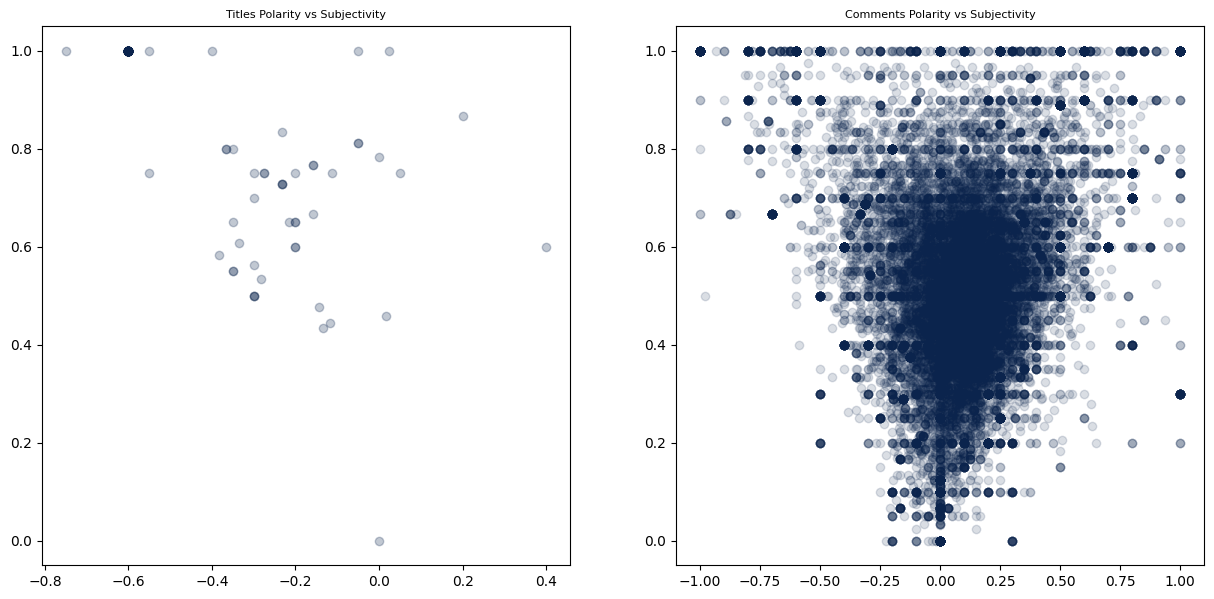

In [ ]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(15,7))
ax1.scatter(df_posts['titles_polarity'], df_posts['titles_subjectivity'], color='#0b244d',alpha=0.25)
ax2.scatter(df_comments['comments_polarity'], df_comments['comments_subjectivity'], color='#0b244d', alpha=0.15)
ax1.set_title("Titles Polarity vs Subjectivity", fontsize=8)
ax2.set_title("Comments Polarity vs Subjectivity", fontsize=8)

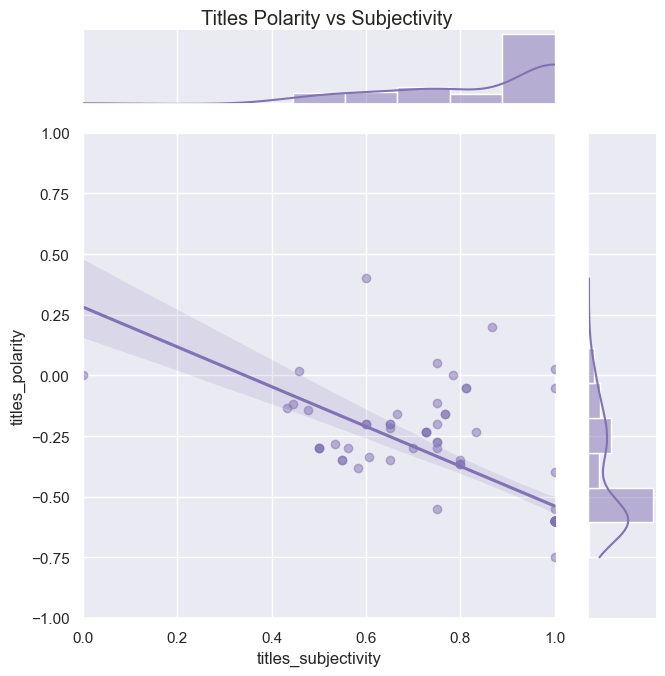

In [ ]:
import seaborn as sns
sns.set_theme(style="darkgrid")

g = sns.jointplot(x="titles_subjectivity", y="titles_polarity", data=df_posts, kind="reg", truncate=False, xlim=(0, 1), ylim=(-1,1), color="m",)
g.fig.suptitle("Titles Polarity vs Subjectivity")
g.ax_joint.collections[0].set_alpha(0.5)
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.95)
g.fig.set_size_inches(7,7)

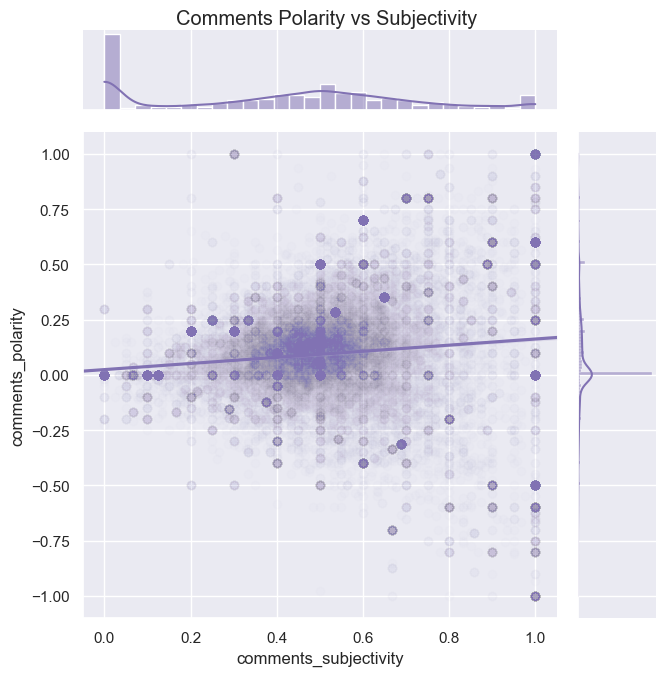

In [ ]:
g = sns.jointplot(x="comments_subjectivity", y="comments_polarity", data=df_comments, kind="reg", truncate=False, color="m",)
g.fig.suptitle("Comments Polarity vs Subjectivity")
g.ax_joint.collections[0].set_alpha(0.01)
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.95)
g.fig.set_size_inches(7,7)

In [ ]:
df_posts['posted_on'] = pd.to_datetime(df_posts['posted_on'])
# df_comments['posted_on'] = pd.to_datetime(df_comments['posted_on'])

df_posts['posted_on'].dtypes

dtype('<M8[ns]')